In [250]:
# Set dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV files
df = pd.read_csv('datasources/yearly_gdp.csv')
df_usd = pd.read_csv('datasources/bancodemexico_usd_to_mxn_historic_processed.csv')

# Which sector has the most growth?

In this Jupyter Notebook, we have analyzed the GDP (Gross Domestic Product) data for different sectors over the years. We have calculated the difference between the first and last year's GDP for each sector to determine the sector with the most growth.

The dataframe `df_aux_sorted` contains the sectors along with their first and last year's GDP values, as well as the GDP difference. The dataframe is sorted in descending order based on the GDP difference.

Let's take a look at the sectors and their corresponding GDP differences:

Based on the analysis, the sector with the most growth is **Manufacturing** with an average yearly GDP of **$272,000,000,000.63** USD.

Please note that this analysis is based on the available data and the assumption that GDP is a measure of growth for each sector.

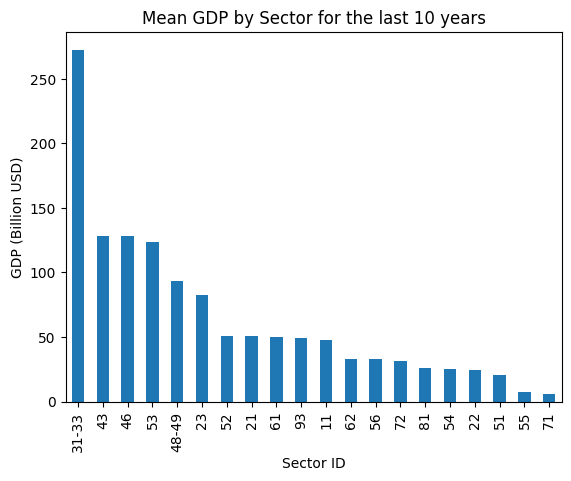

Sector ID
31-33    272.636944
43       128.524261
46       128.052706
53       123.864730
48-49     93.782748
Name: gdp_billion_usd, dtype: float64

In [258]:
# Change df 'Year' column to 'year'
df.rename(columns={'Year': 'year'}, inplace=True)

# Clean data
df_cleaned = df[df['year'].between(2014, 2024)]

# Merge df and df_usd on 'Year'
df_merged = pd.merge(df_cleaned, df_usd, on='year')

# Transform
df_merged['gdp_usd'] = df_merged['GDP'] / df_merged['avg_usd_to_mxn']
df_merged['gdp_usd'] = df_merged['gdp_usd'] / 1000
df_merged.rename(columns={'gdp_usd': 'gdp_billion_usd'}, inplace=True)

# Group by 'sector'
df_grouped = df_merged.groupby('Sector ID')

# Get the mean of 'GDP' for each 'Setor'
df_mean = df_grouped['gdp_billion_usd'].mean()

# Sort by mean GDP
df_mean = df_mean.sort_values(ascending=False)

# Plot the graph
df_mean.plot(kind='bar', title='Mean GDP by Sector for the last 10 years')
plt.ylabel('GDP (Billion USD)')
plt.show()

df_mean.head()

# Agregate linechart

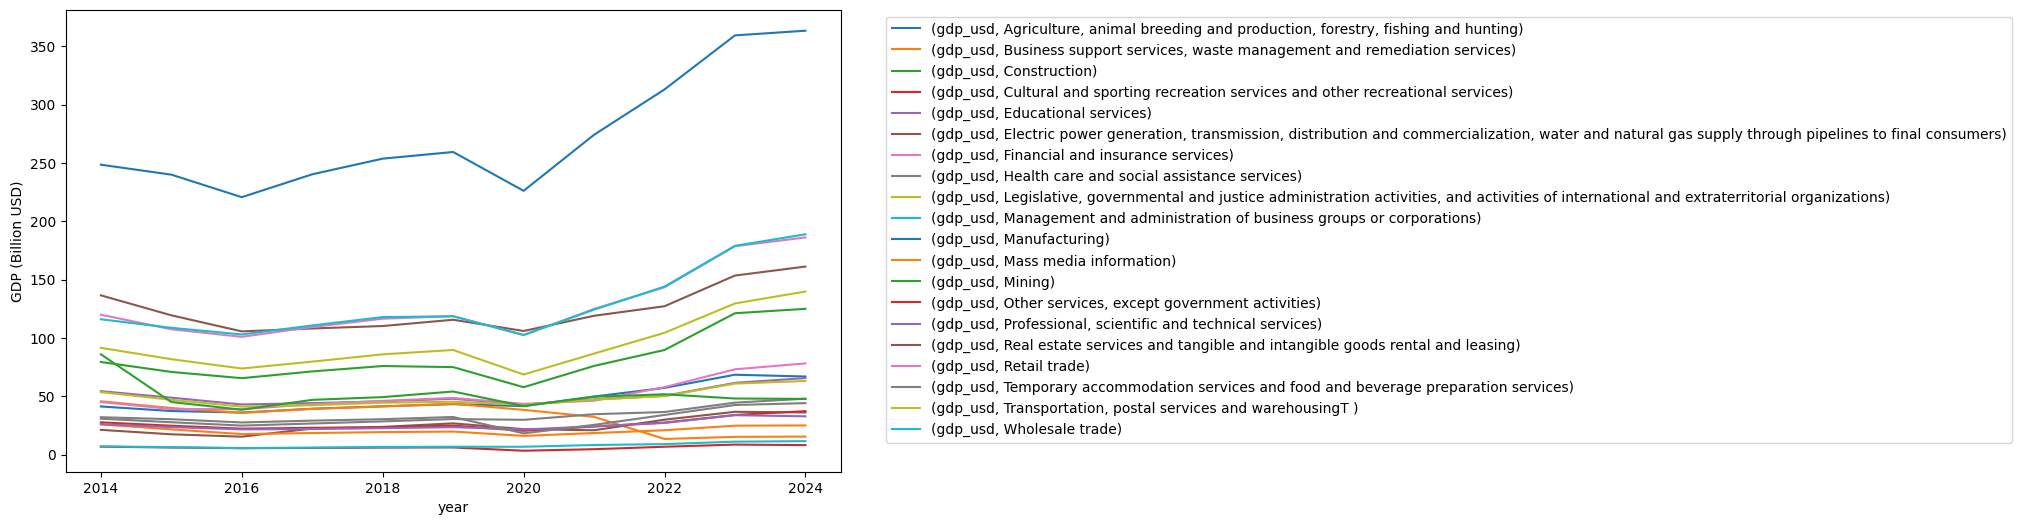

In [252]:
# Read CSV file
dict1 = {
    'Sector': df_merged['Sector'],
    'year': df_merged['year'],
    'gdp_usd': df_merged['gdp_billion_usd']
}

df2 = pd.DataFrame(dict1)

df2 = df2.set_index(['year', 'Sector']).unstack()

#Plot the data
ax = df2.plot(linestyle='-', figsize=(10, 6))
# Customize y-axis labels to show values in trillions
#formatter = plt.FuncFormatter(lambda x, _: f'{x / 1e12:.0f}T')
#ax.yaxis.set_major_formatter(formatter)
plt.ylabel('GDP (Billion USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# GDP changerate


C:\Users\RicardoGomez\AppData\Local\Temp\ipykernel_10996\3579981279.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['changerate'] = df3['changerate'] / df3['gdp_billion_usd'] * 100


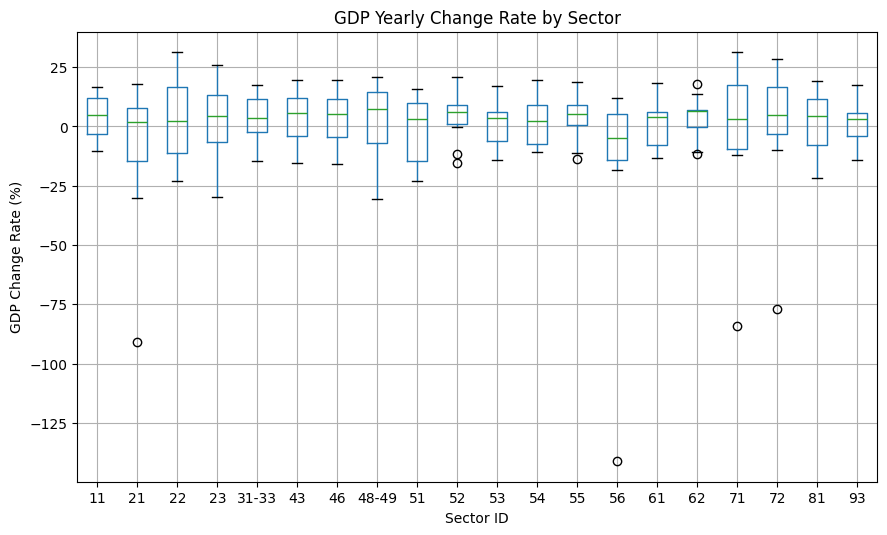

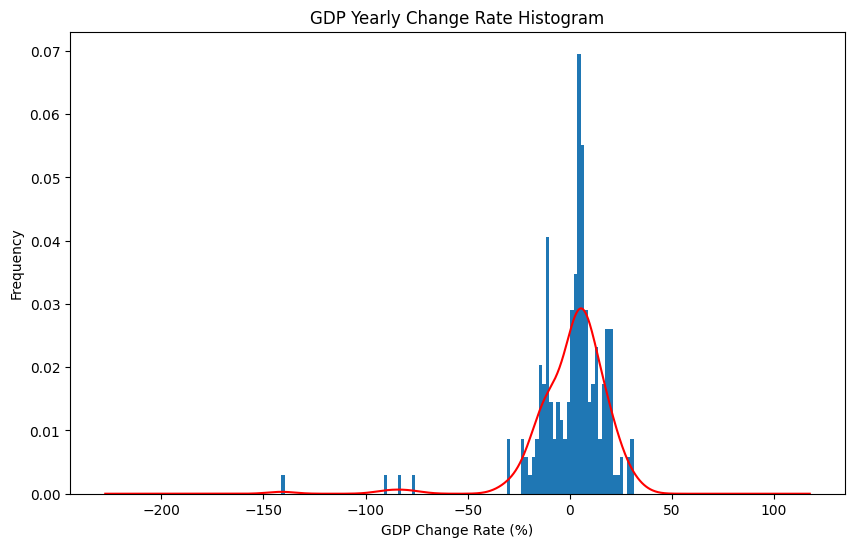

In [253]:
df3 = df_merged

#add a column called changerate that is the difference between the GDP of the current year and the previous year but only if the previous sector is the same as the current sector
df3['changerate'] = df3['gdp_billion_usd'].diff()

#drop every row where the 'year' is 2014
df3 = df3[df3['year'] != 2014]


#Turn the changerate into a percentage
df3['changerate'] = df3['changerate'] / df3['gdp_billion_usd'] * 100

# Boxplot
df3.boxplot(column='changerate', by='Sector ID', figsize=(10, 6))
plt.ylabel('GDP Change Rate (%)')
plt.title('GDP Yearly Change Rate by Sector')
plt.suptitle('')
plt.show()

# Histogram
df3['changerate'].plot(kind='hist', bins=100, density=True, figsize=(10, 6))
df3['changerate'].plot(kind='kde', color='red')
plt.xlabel('GDP Change Rate (%)')
plt.ylabel('Frequency')
plt.title('GDP Yearly Change Rate Histogram')
plt.show()